In [65]:
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [66]:
# Visualize data with PCA, making sure it's standardized

from sklearn.decomposition import PCA

def splitData(d, target):
    y = d[target]
    x = d.drop([target], axis=1)
    return x, y

def getPCA(x):
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(x)
    pc_df = pd.DataFrame(data = pcs, columns = ['principal component 1', 'principal component 2'])
    return pc_df

def plotScatter(X, Y, titles=[], filename=""):
    fig = plt.figure(figsize = (8,8))
    
    for i in range(0, len(X)):
        ax = fig.add_subplot(3,3,(i+1)) 
        ax.set_xlabel('PC 1', fontsize = 15)
        ax.set_ylabel('PC 2', fontsize = 15)
        title = titles[i] if titles else "PCA"
        ax.set_title(title, fontsize = 10)

        colors = matplotlib.colors.ListedColormap(["g", "r"])
        
        scatter = ax.scatter(X[i].iloc[:, 0].values, X[i].iloc[:, 1].values, c=Y[i].values, cmap=colors)
        ax.legend(handles=scatter.legend_elements()[0], labels=["Normal", "Tumor"])
        ax.grid()
    plt.tight_layout()
    if filename:
        plt.savefig(filename, transparent=False, facecolor="white")

In [67]:
import loader as load
# aak_ge = load.loadGEWithClinical()

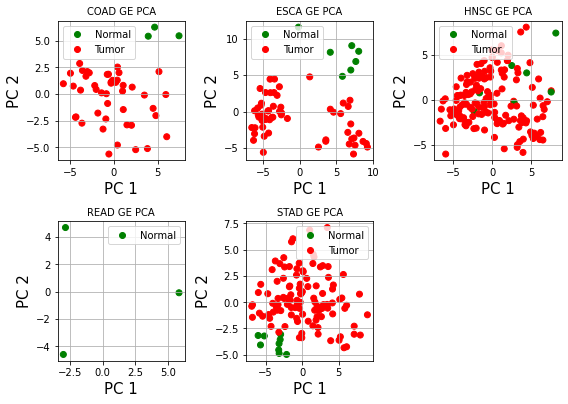

In [68]:
tcma_cancer_type = ["COAD", "ESCA", "HNSC", "READ", "STAD"]
X = []
Y = []
titles = []
for c in tcma_cancer_type:

    # TCMA Genus data~
    b = load.loadTCMA("genus")

    # TCMA Genus x GE(Aakash) data
    # b = load.loadGEOverlappingTCMA("genus")

    # TCMA Phylum data
    b = load.loadTCMA("phylum")

    # TCMA Phylum x GE(Aakash) data
    b = load.loadGEOverlappingTCMA("phylum")

    # GE(Aakash data)
    # b = aak_ge
    
    b = b[b["project"] == c]
    b = b.drop(["project"], axis=1)
    load.attachTumorStatus(b)

    x, y = splitData(b, "tumor")
    X.append(getPCA(x))
    Y.append(y)
    titles.append(f"{c} GE PCA")
plotScatter(X, Y, titles, "")
